In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from numpy import *
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import joblib
from IPython.display import Image
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten,Input
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image 
from keras.layers.normalization import BatchNormalization
from keras.models import Model
from keras import optimizers

In [ ]:
size = 128
batch_size = 64
channels = 3

In [ ]:
import joblib
X_test1 =joblib.load("/content/gdrive/MyDrive/project/X_test11.pkl")

# VGG16 - model 1

In [ ]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [ ]:
!pip3 install tensorflow-gpu

In [ ]:
!nvidia-smi

In [ ]:
#@title 0.43 log loss
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)

for layer in vgg.layers:
	layer.trainable = False
x = vgg(vgg16_input)
x = Flatten()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.6)(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(10, activation='softmax')(x)

# create a model object
model1 = Model(inputs = vgg16_input, outputs = prediction )
model1.load_weights('/content/gdrive/MyDrive/project/vgg_0.36__preproccessed_loss.h5')
y_model1_pred = model1.predict(X_test1)
y_model1_pred_class = argmax(y_model1_pred, axis=1)

# VGG16 - model 2

In [ ]:
model2 = Model(inputs = vgg16_input, outputs = prediction )
model2.load_weights('/content/gdrive/MyDrive/project/vgg_0.41__preproccessed_loss.h5')

y_model2_pred = model2.predict(X_test1)

# VGG16 - model 3

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)

x = vgg(vgg16_input)

x = Flatten()(x)
prediction = Dense(10, activation='softmax')(x)

model3 = Model(inputs = vgg16_input, outputs = prediction )
model3.load_weights('/content/gdrive/MyDrive/project/vgg_0.43__preproccessed_loss.h5')

y_model3_pred = model3.predict(X_test1)
print('Images Predicted until now:',len(y_model3_pred))

Images Predicted until now: 79726


# VGG16 - model 4




In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

# re-size all the images to this
# add preprocessing layer to the front of VGG
vgg16_input = Input(shape = (size,size,channels))

vgg = VGG16(input_tensor=vgg16_input, weights='imagenet', include_top=False)
# X_train2=preprocess_input(X_train)
# X_val2=preprocess_input(X_val)
x = vgg(vgg16_input)

x = Flatten()(x)
prediction = Dense(10, activation='softmax')(x)

model4 = Model(inputs = vgg16_input, outputs = prediction )
model4.load_weights('/content/gdrive/MyDrive/project/vgg_0.45_loss.h5')

y_model4_pred = model4.predict(X_test1)

# Resnet50 - model 5

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


# X_train1=preprocess_input(X_train)
# X_val1=preprocess_input(X_val) -these are not neccessary as 

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
model5 = Model(inputs=baseModel.input, outputs=headModel)

94773248/94765736 [==============================] - 3s 0us/step


In [ ]:
model5.load_weights('/content/gdrive/MyDrive/project/resnet_0.4677_loss_preprocessed.h5')
y_model5_pred = model5.predict(X_test1)

# Resnet50 - model 6

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from keras.applications.resnet50 import preprocess_input


# X_train1=preprocess_input(X_train)
# X_val1=preprocess_input(X_val)

In [ ]:
baseModel = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(128, 128, 3)))
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(512, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
model6 = Model(inputs=baseModel.input, outputs=headModel)

In [ ]:
model6.load_weights('/content/gdrive/MyDrive/project/resnet_0.5_loss_preprocessed.h5')
y_model6_pred = model6.predict(X_test1)

In [ ]:
y_model1_pred=joblib.load("/content/gdrive/MyDrive/project/y_model1_pred.pkl") 
y_model2_pred=joblib.load("/content/gdrive/MyDrive/project/y_model2_pred.pkl") 
y_model3_pred=joblib.load("/content/gdrive/MyDrive/project/y_model3_pred.pkl") 
y_model4_pred=joblib.load("/content/gdrive/MyDrive/project/y_model4_pred.pkl") 
y_model5_pred=joblib.load("/content/gdrive/MyDrive/project/y_model5_pred.pkl") 
y_model6_pred=joblib.load("/content/gdrive/MyDrive/project/y_model6_pred.pkl") 

# Mobilenet model 9

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

X_test2=joblib.load("/content/gdrive/MyDrive/project/X_test2.pkl")

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model9 = Model(inputs=baseModel.input, outputs=headModel)
model9.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.3475_loss_preprocessed.h5")
y_model9_pred = model9.predict(X_test2)
joblib.dump(y_model9_pred,"/content/gdrive/MyDrive/project/y_model9_pred.pkl")     

['/content/gdrive/MyDrive/project/y_model9_pred.pkl']

# Mobilenet model 10





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import  preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

In [ ]:
baseModel = MobileNet(weights="imagenet", include_top=False, input_shape=(128, 128, 3) )
# construct the head of the model that will be placed on top of the
# the base model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten()(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(256, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(10, activation="softmax")(headModel)
# # place the head FC model on top of the base model (this will become
# # the actual model we will train)
model10 = Model(inputs=baseModel.input, outputs=headModel)
model10.load_weights("/content/gdrive/MyDrive/project/mobilenet_0.3407_loss_preprocessed.h5")

y_model10_pred = model10.predict(X_test2)
joblib.dump(y_model10_pred,"/content/gdrive/MyDrive/project/y_model10_pred.pkl")     

# Mean Trimmed Ensembling 


In [ ]:
from statistics import mean
# For Trimmed Mean
ensemble_predictions = []
predictions = []

for i in range(len(X_test2)):
    mean_prediction = []
    average_pred=[]
    for j in range(10):
        predictions = []
        predictions.append(y_model1_pred[i][j])
        predictions.append(y_model2_pred[i][j])
        predictions.append(y_model3_pred[i][j])
        predictions.append(y_model4_pred[i][j])
        predictions.append(y_model5_pred[i][j])
        predictions.append(y_model6_pred[i][j])
        predictions.append(y_model9_pred[i][j])
        predictions.append(y_model10_pred[i][j])

        trimmed_mean = (sum(predictions) - max(predictions) - min(predictions))/(len(predictions) - 2)
        predictions = []
        mean_prediction.append(trimmed_mean)


    average_pred=average_pred/sum(average_pred)
    mean_prediction = mean_prediction/ sum(mean_prediction)
    ensemble_predictions.append(mean_prediction)
        
ensemble_predictions = array(ensemble_predictions)

In [ ]:
joblib.dump(ensemble_predictions,"/content/gdrive/MyDrive/project/ensemble_predictions.pkl")     

# KNN on Images


In [ ]:
import pandas as pd
test_data1 = pd.read_pickle('/content/gdrive/MyDrive/project/knn_test.pkl')
data1=test_data1.to_numpy()

In [ ]:
data1 

array([['img_85907.jpg',
        array([22, 27, 21, ...,  7,  7,  5], dtype=uint8)],
       ['img_24401.jpg',
        array([11, 11,  8, ...,  8,  7,  3], dtype=uint8)],
       ['img_18299.jpg',
        array([38, 48, 37, ..., 23, 12, 14], dtype=uint8)],
       ...,
       ['img_37544.jpg',
        array([66, 76, 60, ..., 10,  8,  9], dtype=uint8)],
       ['img_7485.jpg',
        array([28, 34, 20, ..., 43, 48, 56], dtype=uint8)],
       ['img_31518.jpg',
        array([38, 46, 31, ..., 44, 61, 80], dtype=uint8)]], dtype=object)

In [ ]:
data_dict=dict(( data1[i][0], data1[i][1]) for i in range(len(data1) ) )
knn_input=array([data_dict[imgs[i]] for i in range(len(imgs))])  # To get knn_input in same order as imgs list
knn_input

array([[ 21,  23,  18, ...,  11,   5,   5],
       [ 22,  25,  16, ...,  22,  21,  19],
       [248, 254, 254, ...,  31,  42,  35],
       ...,
       [ 21,  22,  17, ...,  18,  14,  15],
       [ 28,  35,  25, ...,  36,  49,  62],
       [ 13,  19,  13, ...,   9,   8,   4]], dtype=uint8)

In [ ]:
imgs= joblib.dump(knn_input,'/content/gdrive/MyDrive/project/knn_input.pkl')

(-0.5, 39.5, 29.5, -0.5)

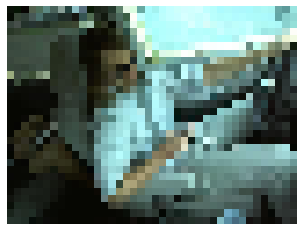

In [ ]:
plt.imshow(knn_input[10].reshape(30,40,3))
plt.axis('off')

In [ ]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh stable

import sys, os

dist_package_index = sys.path.index('/usr/local/lib/python3.7/dist-packages')
sys.path = sys.path[:dist_package_index] + ['/usr/local/lib/python3.7/site-packages'] + sys.path[dist_package_index:]
sys.path
exec(open('rapidsai-csp-utils/colab/update_modules.py').read(), globals())

In [ ]:
import joblib
imgs=joblib.load( "/content/gdrive/MyDrive/project/img_names.pkl")

In [ ]:
imgs=imgs.reshape(len(imgs),1)

In [ ]:
from cuml.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=15)
knn.fit(knn_input)
distances, indices1 = knn.kneighbors(knn_input)

In [ ]:
knn_predictions = []
predictions = []

for i in range(indices1.shape[0]):
    mean_prediction = []
    for j in range(10):
        for k in indices1[i]:
            predictions.append(ensemble_predictions[k][j])
        
        trimmed_value = (sum(predictions) - max(predictions) - min(predictions))/(len(predictions) -2 )
        mean_value = mean(predictions)
        predictions = []
        mean_prediction.append(trimmed_value)
    
    mean_prediction = mean_prediction/sum(mean_prediction)
    knn_predictions.append(mean_prediction)
            
knn_predictions = array(knn_predictions)           

In [ ]:
final = np.concatenate((imgs,knn_predictions),axis=1)
final.shape

(79726, 11)

In [ ]:
# I got a log loss of 0.27773 with this prediction 